## [GitHub URL]

#### https://github.com/Hojin-Sa/Deep_Learning

# Load packages

In [2]:
import torch
import torch.nn as nn
import torchvision.datasets as dset
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torch.autograd import Variable
import matplotlib.pyplot as plt
%matplotlib inline


# MNIST train, test dataset 가져오기

In [4]:
# "" 현재 폴더에 MNIST 있음
mnist_train=dset.MNIST("", train=True,transform=transforms.ToTensor(),
                      target_transform=None, download=True)
mnist_test=dset.MNIST("", train=False,transform=transforms.ToTensor(),
                     target_transform=None, download=True)

# 대략적인 데이터 형태

mnist_train 길이: 60000
mnist_test 길이: 10000
image data 형태: torch.Size([1, 28, 28])
label:  5


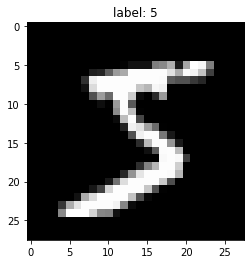

In [5]:
print("mnist_train 길이:", len(mnist_train))
print("mnist_test 길이:", len(mnist_test))

# 데이터 하나 형태
image, label = mnist_train.__getitem__(0) # 0번째 데이터
print("image data 형태:", image.size())
print("label: ", label)

#그리기
img = image.numpy() # image 타입을 numpy로 변환 (1,28,28)
plt.title("label: %d" %label )
plt.imshow(img[0], cmap='gray')
plt.show()

5
torch.Size([1, 28, 28])
5


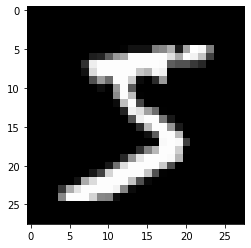

0


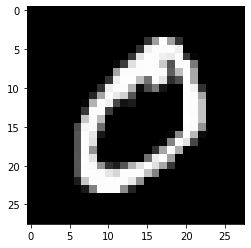

4


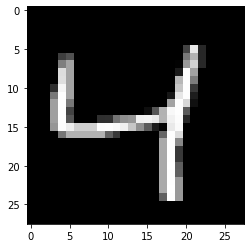

In [6]:
# MNIST data 띄워보기
print(mnist_train[0][1]) #label
print(mnist_train[0][0].size()) #image

for i in range(3):
    img=mnist_train[i][0].numpy()
    print(mnist_train[i][1])
    plt.imshow(img[0],cmap='gray')
    plt.show()

# convolution 하나 씌워보기

torch.Size([1, 1, 28, 28])
5
torch.Size([1, 3, 28, 28])


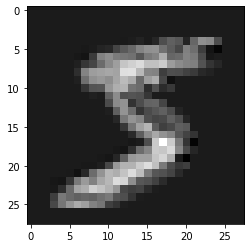

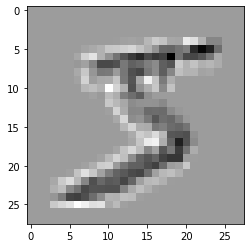

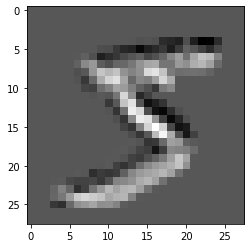

In [8]:
# mnist의 첫 번쨰 이미지, 라벨 가져오기
image, label = mnist_train[0]
# view: tensor의 사이즈 조절, -1: 해당 차원 차원 확장시켜라~
# [1,28,28] -> [1,1,28,28]
image=image.view(-1, image.size()[0], image.size()[1], image.size()[2])
print(image.size())

print(label)

# convolution filter 정의
conv_layer=nn.Conv2d(in_channels=1,out_channels=3,kernel_size=3,padding=1)
# image에 filter 적용
output=conv_layer(Variable(image))
print(output.size())

for i in range(3):
    plt.imshow(output[0,i,:,:].data.numpy(), cmap='gray')
    plt.show()

# CNN 만들기

### train, test data 가져오기

In [9]:
import numpy as np
import torch.optim as optim

batch_size = 16
learning_rate = 0.0002
num_epoch = 10 # 1000

In [10]:
# 후에 학습시킬 때 batch_size 단위로 학습시켜나감
train_loader = torch.utils.data.DataLoader(list(mnist_train)[:batch_size*100], batch_size=batch_size,  #mnist_train 를 train 시키고
                                               shuffle=True, num_workers=2,
                                               drop_last=True) # batch_size 만큼 나눌 때 나머지는 버려라
test_loader = torch.utils.data.DataLoader((mnist_test), batch_size=batch_size,  
                                               shuffle=False, num_workers=2,
                                               drop_last=True)

# CNN 클래스 만들기 (모델 만들기)

In [12]:
class CNN(nn.Module): # nn.Module 상속받음
    def __init__(self):
        super(CNN, self).__init__()  # 28 x 28
        self.layer=nn.Sequential(
            nn.Conv2d(1, 16, 5, padding=2),
            nn.ReLU(),
        
            nn.Conv2d(16, 32, 5, padding=2), # 28 x 28
            nn.ReLU(),
            nn.MaxPool2d(2,2), # 28x28 -> 14x14
        
            nn.Conv2d(32, 64, 5, padding=2), # 14x14
            nn.ReLU(),
            nn.MaxPool2d(2,2) # 14x14 -> 7x7
        )
        self.fc_layer=nn.Sequential(
            nn.Linear(64*7*7, 100),
            nn.ReLU(),
            nn.Linear(100, 10)
        )
        
    def forward(self, x):
        out = self.layer(x)
        out = out.view(batch_size, -1)
        out = self.fc_layer(out)
        return out

model = CNN()

In [15]:
# 파라미터 체크하기
for parameter in model.parameters():
    print(parameter.shape)
    #print(parameter)

torch.Size([16, 1, 5, 5])
torch.Size([16])
torch.Size([32, 16, 5, 5])
torch.Size([32])
torch.Size([64, 32, 5, 5])
torch.Size([64])
torch.Size([100, 3136])
torch.Size([100])
torch.Size([10, 100])
torch.Size([10])


In [16]:
for parameter in model.parameters():
    print(parameter)

Parameter containing:
tensor([[[[-0.1451, -0.0310,  0.1231,  0.1456, -0.1477],
          [-0.0760, -0.1230, -0.1669, -0.1152, -0.0177],
          [-0.1088,  0.0469,  0.1151,  0.1976, -0.0129],
          [-0.1000,  0.1881, -0.0928,  0.0875,  0.0464],
          [ 0.1212, -0.1585,  0.0565, -0.1561, -0.0392]]],


        [[[-0.0570,  0.0464, -0.1599,  0.1158,  0.0974],
          [ 0.0964,  0.0929, -0.1413,  0.0668,  0.0891],
          [ 0.1408,  0.0483,  0.0410, -0.1194,  0.0741],
          [ 0.0940,  0.0137, -0.1797,  0.0399, -0.1611],
          [ 0.0691, -0.1081, -0.1890,  0.1557,  0.0936]]],


        [[[-0.1967,  0.1308,  0.0344, -0.0978,  0.0500],
          [-0.0807,  0.0788, -0.0870, -0.1498,  0.0978],
          [-0.0205,  0.0169, -0.0010,  0.0529,  0.0483],
          [ 0.0525, -0.0490,  0.0810, -0.0742,  0.0151],
          [ 0.1630,  0.1560,  0.1799, -0.1967, -0.1657]]],


        [[[-0.0901, -0.0382,  0.1453, -0.0406,  0.1951],
          [-0.0070, -0.1934,  0.0129,  0.0703,  0.1424

In [17]:
# loss function, optimizer 선언
loss_func = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# optimization

In [18]:
for i in range(num_epoch):
    for j, [image, label] in enumerate(train_loader): # batch_size 만큼
        x = Variable(image)
        y_ = Variable(label)
        
        optimizer.zero_grad() # optimizer 안에서 이전 gradient 들을 초기화!
        output = model.forward(x)
        loss = loss_func(output, y_)  #(예측값, 정답)
        loss.backward() # gradient 계산
        optimizer.step() # parameter 업데이트
        
        if j%50==0:
            print(loss, j, i)

tensor(2.3197, grad_fn=<NllLossBackward>) 0 0
tensor(1.9454, grad_fn=<NllLossBackward>) 50 0
tensor(0.7053, grad_fn=<NllLossBackward>) 0 1
tensor(0.6735, grad_fn=<NllLossBackward>) 50 1
tensor(0.6100, grad_fn=<NllLossBackward>) 0 2
tensor(0.4214, grad_fn=<NllLossBackward>) 50 2
tensor(0.2456, grad_fn=<NllLossBackward>) 0 3
tensor(0.4824, grad_fn=<NllLossBackward>) 50 3
tensor(0.3179, grad_fn=<NllLossBackward>) 0 4
tensor(0.0881, grad_fn=<NllLossBackward>) 50 4
tensor(0.1779, grad_fn=<NllLossBackward>) 0 5
tensor(0.1375, grad_fn=<NllLossBackward>) 50 5
tensor(0.1377, grad_fn=<NllLossBackward>) 0 6
tensor(0.0991, grad_fn=<NllLossBackward>) 50 6
tensor(0.0100, grad_fn=<NllLossBackward>) 0 7
tensor(0.2368, grad_fn=<NllLossBackward>) 50 7
tensor(0.0201, grad_fn=<NllLossBackward>) 0 8
tensor(0.0216, grad_fn=<NllLossBackward>) 50 8
tensor(0.0119, grad_fn=<NllLossBackward>) 0 9
tensor(0.0064, grad_fn=<NllLossBackward>) 50 9


In [19]:
# 모델 저장시키기
torch.save(model, 'mycnn_model_%d.pkl'%(num_epoch))

In [20]:
try:
    model=torch.load('mycnn_model_10.pkl')
    print("model restored")
except:
    print("model not restored")

model restored


In [21]:
def ComputeAccr(dloader, imodel):
    correct = 0
    total = 0
    
    for j, [imgs, labels] in enumerate(dloader): # batch_size만큼
        img = Variable(imgs) # x
        label = Variable(labels) # y
        
        output = imodel.forward(img) # forward prop
        _, output_index = torch.max(output, 1)
        
        total += label.size(0)
        correct += (output_index == label).sum().float()
    print("Accuracy of Test Data: {}".format(100*correct/total))

In [23]:
ComputeAccr(test_loader, model)

Accuracy of Test Data: 94.77999877929688
